In [5]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import scipy
import scipy.optimize
from convolve import Kernel, ImgAsArray

In [30]:
img = cv2.imread('image livre/librairie3.jpg')
res = np.copy(img).view(ImgAsArray)

In [31]:
def to_optimize(x):
    w1,w2,w3 = x
    global img
    R,G,B = img[:,:,0], img[:,:,1], img[:,:,2]
    return -np.var(w1*R+w2*G+w3*B)/(w1+w2+w3)**2

In [32]:
scipy.optimize.fmin_bfgs(to_optimize,(1,1,1))

         Current function value: -22155362.606328
         Iterations: 2
         Function evaluations: 264
         Gradient evaluations: 63


array([ -79844.51510453,  368654.89761522, -287436.45227875])

In [37]:
w1,w2,w3 = [85168565.20604391, 92879996.22928019, 78388915.52249216]
R,G,B = img[:,:,0], img[:,:,1], img[:,:,2]
Max = (w1*R+w2*G+w3*B)/(w1+w2+w3)
np.var(B)

3358.364108626371

In [121]:
window1 = (400,500)
window2 = (850,1000)

In [122]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY).view(ImgAsArray).T
blured = cv2.GaussianBlur(gray,(3,5),0).view(ImgAsArray)
edges = cv2.Canny(gray,50,200).view(ImgAsArray)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f0c73a2e520>)

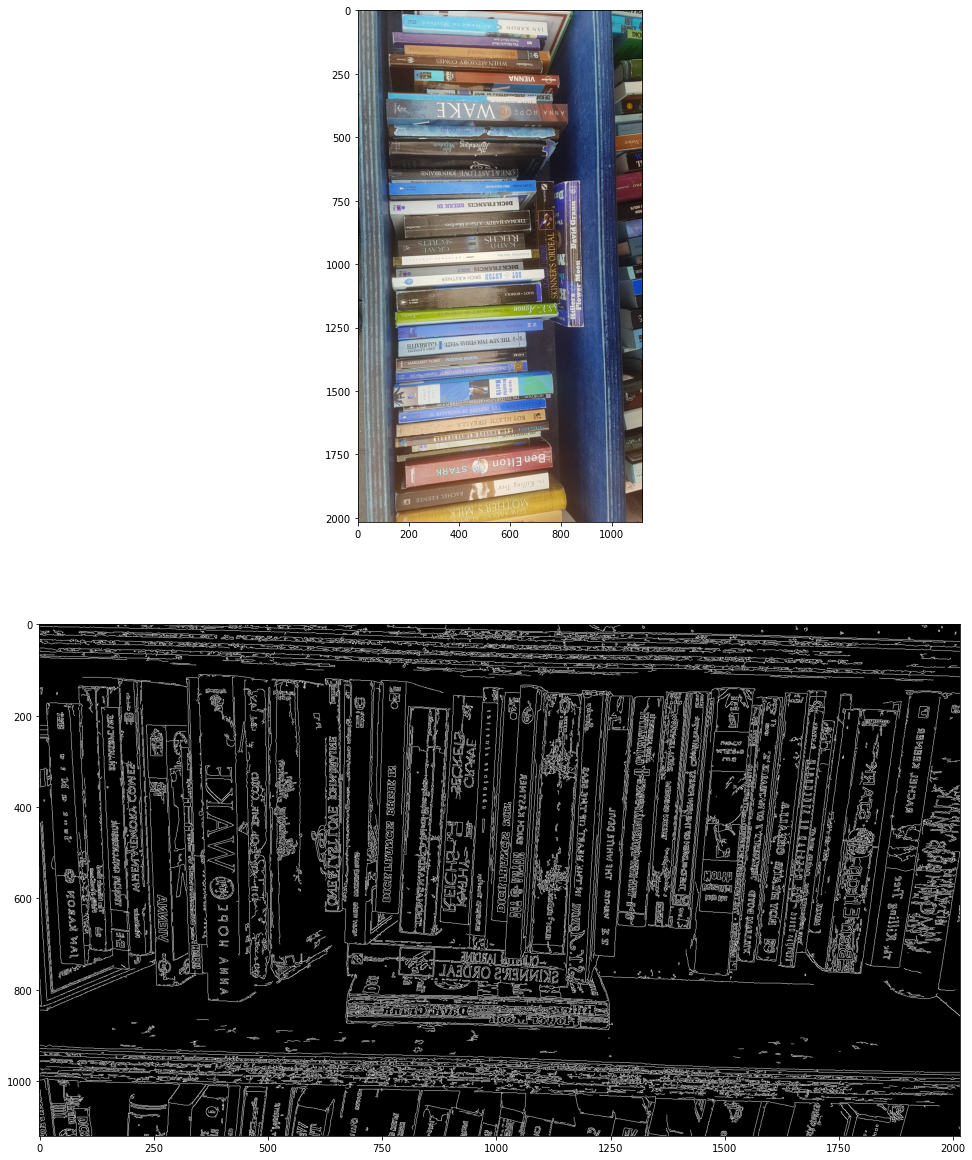

In [123]:
fig = plt.figure(figsize = (48,32))
plt.subplot(311),plt.imshow(img,cmap = 'gray')
plt.subplot(312),plt.imshow(edges,cmap = 'gray')

In [124]:
minLineLength = 500
maxLineGap = 40
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 465, minLineLength=10, maxLineGap=500)
lines = list(lines.reshape((len(lines), 4)))


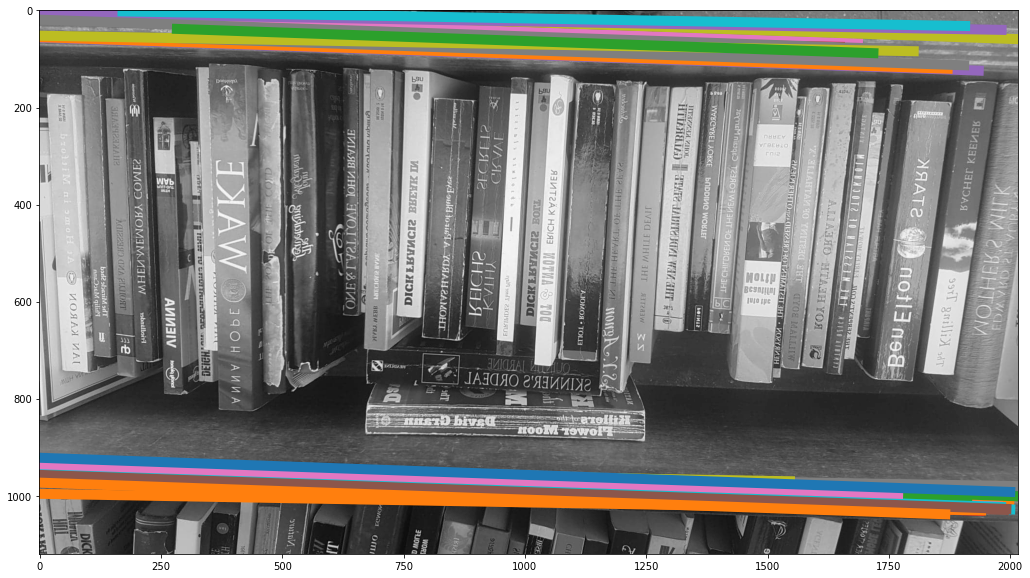

In [125]:
res = np.copy(gray)
for line in lines:
    x1, y1, x2, y2 = line
    plt.plot([x1,x2],[y1,y2],linewidth=10)
plt.imshow(gray,cmap='gray')
#Show result [200:500,750:1000]
#cv2.imwrite('result.jpg',res)

In [126]:
def selectLines(Lines:list):
    Lines.sort(key=lambda l : l[1])
    x1, y1, x2, y2 = lines[0]
    res = []
    if np.abs(y1-y2) <= 100: res.append(Lines[0])
    for i in range(1,len(Lines)):
        x1, y1, x2, y2 = lines[i]
        if np.abs(y1-y2) <= 100:
            if (np.abs(y1-Lines[i-1][1])+np.abs(y2-Lines[i-1][3]))/2  >= 100:
                #Distance between two lines is big
                res.append(Lines[i])
    return res

[array([ 303,    0, 2012,   59], dtype=int32), array([  10,  922, 2000,  992], dtype=int32)]


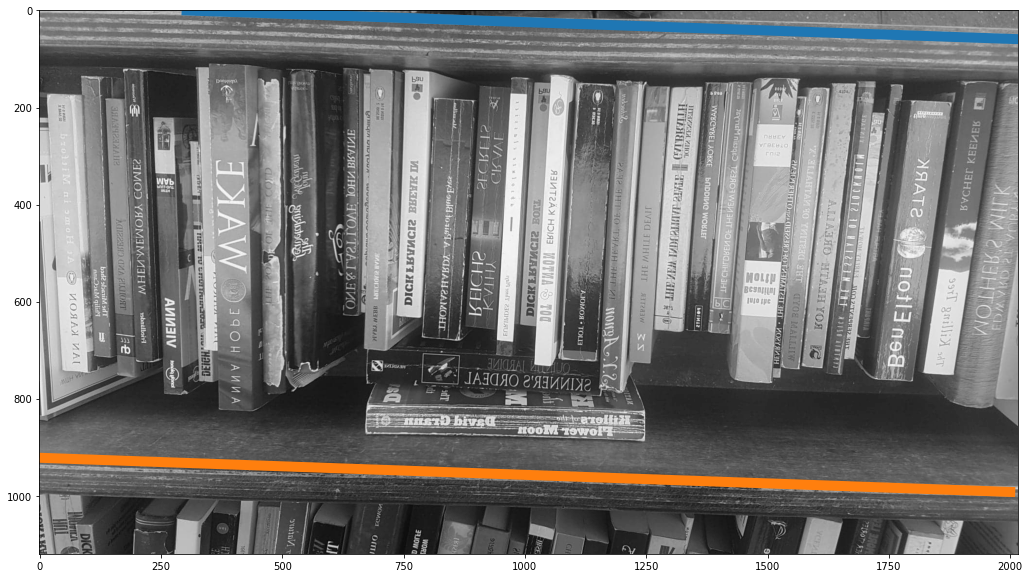

In [127]:
Selected = selectLines(lines)
print(Selected)
for line in Selected:
    x1, y1, x2, y2 = line
    plt.plot([x1,x2],[y1,y2],linewidth=10)
plt.imshow(gray,cmap='gray')

In [94]:
a = Kernel((7,7))
a[3,3] = 255
blured = cv2.GaussianBlur(a,(3,7),0)
blured = cv2.GaussianBlur(blured,(1,7),0).view(ImgAsArray)
blured

ImgAsArray([[ 0.        ,  0.        ,  8.34228516, 16.68457031,
              8.34228516,  0.        ,  0.        ],
            [ 0.        ,  0.        ,  9.47845459, 18.95690918,
              9.47845459,  0.        ,  0.        ],
            [ 0.        ,  0.        , 11.76635742, 23.53271484,
             11.76635742,  0.        ,  0.        ],
            [ 0.        ,  0.        , 12.91809082, 25.83618164,
             12.91809082,  0.        ,  0.        ],
            [ 0.        ,  0.        , 11.76635742, 23.53271484,
             11.76635742,  0.        ,  0.        ],
            [ 0.        ,  0.        ,  9.47845459, 18.95690918,
              9.47845459,  0.        ,  0.        ],
            [ 0.        ,  0.        ,  8.34228516, 16.68457031,
              8.34228516,  0.        ,  0.        ]])

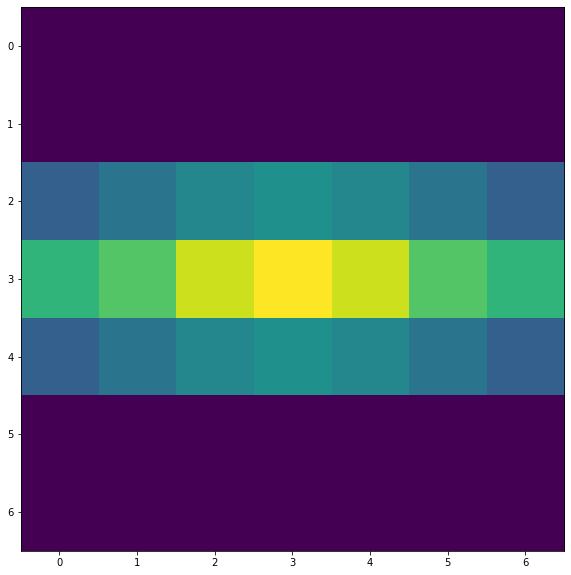

In [10]:
plt.imshow(blured.T)